### Lineare Regression

In [1]:
# Libraries
import os
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/workspaces/python_machine_learning_basics/EigeneAufgabe


#### import data from dataset

In [2]:
# Define columns for import
columns = [ 'Student_ID',
           'IQ',
           'Grade',
           'Age',
           'Parents_Income',
           'Efficiency']

# Read and select variables
df_orig = pd.read_csv("./Updated_Student_Dataset_with_Efficiency.csv", 
                      sep=",", 
                      encoding='utf-8')[columns]

# switch to lowercase
df_orig.columns = df_orig.columns.str.lower()

# Remove missing values
#df = df_orig.dropna()
#df.head(5)

# Remove duplicates
#df = df.drop_duplicates()

# Remove some 'extreme' values
#df = df.loc[(df['price'] >= 1000) & (df['price'] <= 5000)]

#print(df.shape)
print(f"Number of missing values: {pd.isna(df_orig).sum().sum()}")
df_orig.head(5)

Number of missing values: 0


,student_id,iq,grade,age,parents_income,efficiency
0,Student_0001,107.0,79.0,24,30322.0,80.0
1,Student_0002,98.0,89.0,21,52164.0,82.0
2,Student_0003,110.0,56.0,18,34049.0,70.0
3,Student_0004,123.0,76.0,20,38899.0,85.0
4,Student_0005,96.0,63.0,22,58381.0,68.0


### Simple linear regression (only one explanatory variable in the model)

In [3]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df_orig['efficiency'], 
                                                    df_orig['grade'],            #das ist die Zielvariable
                                                    test_size=0.20, 
                                                    random_state=42)
# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
249    68.0
433    66.0
19     68.0
322    79.0
332    68.0
Name: efficiency, dtype: float64 

y_train:
249    56.0
433    48.0
19     78.0
322    93.0
332    60.0
Name: grade, dtype: float64


### Fit the simple linear regression model

In [4]:
# Fit the regression model
slope, intercept, r, p, std_err = stats.linregress(X_train, y_train)

# Print results of the regression model
print('Linear regression result:')
print(f'Intercept with y-axis (alpha):            {intercept:.2f}')
print(f'Slope of regression line (beta):          {slope:.3f}')
print(f'p-value:                                  {p:.4f}')
print(f'R-squared (coefficient of determination): {r**2:.4f}')

Linear regression result:
Intercept with y-axis (alpha):            12.79
Slope of regression line (beta):          0.785
p-value:                                  0.0000
R-squared (coefficient of determination): 0.3647


### Plot regression line

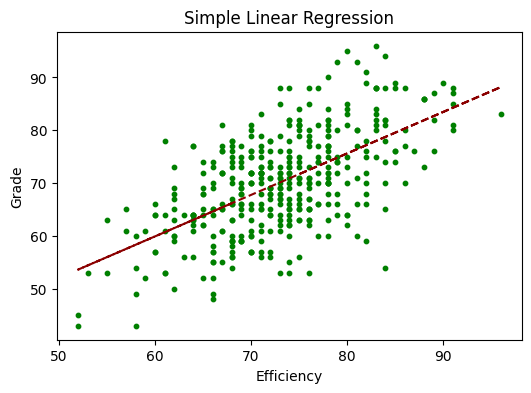

In [5]:
# Function to calculate model predictions
def myfunc(x):
    return slope * x + intercept

# Apply myfunc() to x, i.e. make predictions 
mymodel = pd.Series(map(myfunc, X_train))

# Scatterplot with regression line
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, s=10, color='green')
plt.plot(X_train, mymodel, color='darkred', linestyle='dashed')
plt.title('Simple Linear Regression')
plt.xlabel('Efficiency')
plt.ylabel('Grade')

plt.show()

### Check model residuals (residuals = observed prices minus predicted prices)

In [6]:
# Calculate model residuals for train data
residuals = y_train - mymodel

# Check the first residual value in our data set
print(f'1st Predicted price in dataset: {mymodel[0]:.2f}')
print(f'1st Observed price in dataset: {y_train[1]:.2f}')
print(f'1st Residual price in dataset: {residuals[1]:.2f}')


1st Predicted price in dataset: 66.18
1st Observed price in dataset: 89.00
1st Residual price in dataset: 24.39


### Histogramm der Residuals

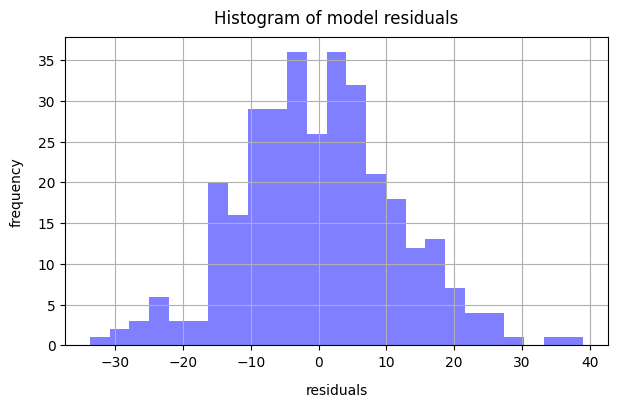

In [7]:
# Plot histogram of residuals
fig = plt.figure( figsize=(7,4))
n, bins, patches = plt.hist(x=residuals, 
                            bins=25, 
                            color='blue',
                            alpha=0.5
                   )

# Set title and labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)
plt.grid()

# Show plot
plt.show()

### Compare the observed grades with the predicted grades

In [8]:
# Create model predictions for test data
predicted = myfunc(X_test)
predicted.round(1)

# Compare the observed prices with the predicted prices
for i in range(0,10):
    print(f'Observed grade: {y_test.iloc[i]:.1f}, Predicted grade: {predicted.iloc[i]:.1f}')

Observed grade: 55.0, Predicted grade: 70.9
Observed grade: 68.0, Predicted grade: 76.4
Observed grade: 70.0, Predicted grade: 80.3
Observed grade: 71.0, Predicted grade: 67.0
Observed grade: 74.0, Predicted grade: 70.9
Observed grade: 84.0, Predicted grade: 81.1
Observed grade: 72.0, Predicted grade: 71.7
Observed grade: 86.0, Predicted grade: 79.5
Observed grade: 51.0, Predicted grade: 64.6
Observed grade: 68.0, Predicted grade: 68.5


## Multiple linear regression (more than one explanatory variable in the model)

### Create train and test samples (train = 80%, test = 20% of the data)

In [9]:
# log
#df['price_log'] = np.log(df['price'])     # das wurde zusätzlich ergänz


# Create train and test samples (we name it X2_ and y_2 because we already used X_ and y_ above)
X2_train, X2_test, y2_train, y2_test = train_test_split(df_orig[['efficiency', 'iq','age', 'parents_income']], 
                                                        df_orig['grade'], 
                                                        test_size=0.20, 
                                                        random_state=42)

# Show X2_train
print('X2_train:')
print(X2_train.head(), '\n')

# Show y2_train
print('y2_train:')
print(y2_train.head())

X2_train:
     efficiency     iq  age  parents_income
249        68.0  106.0   23         31923.0
433        66.0  111.0   24         30752.0
19         68.0   79.0   21         63022.0
322        79.0   88.0   23         56432.0
332        68.0  101.0   23         42699.0 

y2_train:
249    56.0
433    48.0
19     78.0
322    93.0
332    60.0
Name: grade, dtype: float64


### Fit the multiple regression model (yes, the output is rich :-), but we need only part of it for interpretation!)

In [10]:
# Add constant to the model
X2_train_const = sm.add_constant(X2_train)

# Create the multiple regression model
olsmod = sm.OLS(y_train, X2_train_const)
olsres = olsmod.fit()

# Print full model output
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                  grade   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 2.710e+04
Date:                Sun, 10 Nov 2024   Prob (F-statistic):               0.00
Time:                        18:38:19   Log-Likelihood:                -348.52
No. Observations:                 400   AIC:                             707.0
Df Residuals:                     395   BIC:                             727.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.6719      0.460     -1.

### Plot histogram of residuals

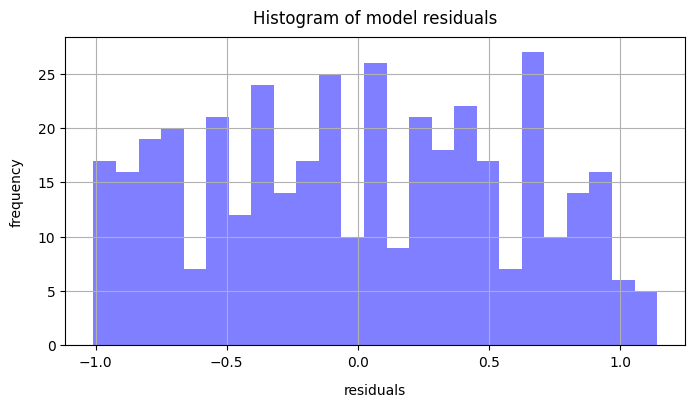

In [11]:
# Plot histogram of residuals
fig = plt.figure( figsize=(8,4))
n, bins, patches = plt.hist(x=olsres.resid, 
                            bins=25, 
                            color='blue',
                            alpha=0.5
                   )

# Set labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)
plt.grid()

plt.show()

### Compare observed grades with predicted grades

In [12]:
# Add constant to X2_test
X2_test_const = sm.add_constant(X2_test)
predicted_new = olsres.predict(X2_test_const)

# Compare the observed prices with the predicted prices
for i in range(0,10):
    print(f'Observed grade: {y_test.iloc[i]:.1f}, Predicted grade: {predicted_new.iloc[i]:.1f}')

Observed grade: 55.0, Predicted grade: 54.1
Observed grade: 68.0, Predicted grade: 67.5
Observed grade: 70.0, Predicted grade: 70.8
Observed grade: 71.0, Predicted grade: 70.3
Observed grade: 74.0, Predicted grade: 73.7
Observed grade: 84.0, Predicted grade: 84.4
Observed grade: 72.0, Predicted grade: 72.4
Observed grade: 86.0, Predicted grade: 86.8
Observed grade: 51.0, Predicted grade: 51.8
Observed grade: 68.0, Predicted grade: 67.3


# Regression Tree

In [1]:
# Libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

from sklearn import tree
from sklearn.metrics import RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/workspaces/python_machine_learning_basics/EigeneAufgabe


In [2]:
# Define columns for import
columns = [ 'Student_ID',
           'IQ',
           'Grade',
           'Age',
           'Parents_Income',
           'Efficiency']

df_performance_orig = pd.read_csv("./Updated_Student_Dataset_with_Efficiency.csv", 
                                   sep=",", 
                                   encoding="utf-8")[columns]

# Number of rows and columns
print(df_performance_orig.shape)

# Brand to upper case letters
df_performance_orig.columns = df_performance_orig.columns.str.lower()

# First records
df_performance_orig.head(5)

(500, 6)


,student_id,iq,grade,age,parents_income,efficiency
0,Student_0001,107.0,79.0,24,30322.0,80.0
1,Student_0002,98.0,89.0,21,52164.0,82.0
2,Student_0003,110.0,56.0,18,34049.0,70.0
3,Student_0004,123.0,76.0,20,38899.0,85.0
4,Student_0005,96.0,63.0,22,58381.0,68.0


In [13]:
print(df_performance_orig['grade'].min())
print(df_performance_orig['grade'].max())

df_performance_orig['grade_category'] = pd.cut(df_performance_orig['grade'],
                              bins=[0, 20, 50, 70, 90, 100],  # Die Grenzen der Kategorien
                              labels=['F', 'D', 'C', 'B', 'A'],  # Die Kategorien-Buchstaben
                              right=True)  # Die Grenzwerte beinhalten die rechten Werte
print(df_performance_orig['grade_category'].min())
print(df_performance_orig['grade_category'].max())

43.0
96.0
D
A


In [14]:
# Count missing values
print(df_performance_orig.isna().sum())
df = df_performance_orig
df

student_id        0
iq                0
grade             0
age               0
parents_income    0
efficiency        0
grade_category    0
dtype: int64


,student_id,iq,grade,age,parents_income,efficiency,grade_category
0,Student_0001,107.0,79.0,24,30322.0,80.0,B
1,Student_0002,98.0,89.0,21,52164.0,82.0,B
2,Student_0003,110.0,56.0,18,34049.0,70.0,C
3,Student_0004,123.0,76.0,20,38899.0,85.0,B
4,Student_0005,96.0,63.0,22,58381.0,68.0,C
...,...,...,...,...,...,...,...
495,Student_0496,108.0,67.0,20,30185.0,75.0,C
496,Student_0497,84.0,88.0,21,46426.0,76.0,B
497,Student_0498,97.0,76.0,19,34794.0,75.0,B
498,Student_0499,87.0,64.0,18,48534.0,65.0,C


### Create train and test samples (train = 80%, test = 20% of the data)

In [16]:
# Create train and test samples            ... oben ist immer X-Achse und danach kommt target variable ..hier brand z.b und x sind die restlichen oben
X_train, X_test, y_train, y_test = train_test_split(df[['iq', 'age', 'parents_income', 'efficiency']],
                                                    df['grade_category'], 
                                                    test_size=0.20, 
                                                    random_state=42)

# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
        iq  age  parents_income  efficiency
249  106.0   23         31923.0        68.0
433  111.0   24         30752.0        66.0
19    79.0   21         63022.0        68.0
322   88.0   23         56432.0        79.0
332  101.0   23         42699.0        68.0 

y_train:
249    C
433    D
19     B
322    A
332    C
Name: grade_category, dtype: category
Categories (5, object): ['F' < 'D' < 'C' < 'B' < 'A']


In [17]:
# Initialize the classification tree model 
clf = DecisionTreeClassifier(random_state=42, 
                             max_depth=5)

# Train the classification tree model 
clf = clf.fit(X_train, y_train)

# Make model predictions
y_pred = clf.predict(X_test)
y_pred

array(['C', 'C', 'B', 'C', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'B', 'C',
       'C', 'C', 'C', 'C', 'B', 'B', 'B', 'B', 'C', 'B', 'C', 'B', 'B',
       'B', 'C', 'C', 'C', 'C', 'B', 'C', 'C', 'C', 'C', 'B', 'B', 'B',
       'C', 'B', 'B', 'C', 'B', 'C', 'B', 'B', 'C', 'B', 'C', 'B', 'C',
       'B', 'C', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'B', 'B', 'B', 'B',
       'C', 'C', 'B', 'B', 'B', 'C', 'B', 'C', 'B', 'B', 'C', 'C', 'C',
       'B', 'A', 'B', 'B', 'C', 'C', 'B', 'B', 'B', 'B', 'B', 'C', 'C',
       'B', 'B', 'C', 'B', 'B', 'C', 'D', 'C', 'B'], dtype=object)

In [18]:
# Confusion matrix
print('Confusion matrix')
print(confusion_matrix(y_test, y_pred), '\n')

# Classification report
print('Classification report')
print(classification_report(y_test, y_pred))

# 97 und 25 sind die richtig predicted brands
# 11 und 7 sind flasch predicted brands

Confusion matrix
[[ 0  4  0  0]
 [ 1 41  6  0]
 [ 0  5 40  0]
 [ 0  0  2  1]] 

Classification report
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         4
           B       0.82      0.85      0.84        48
           C       0.83      0.89      0.86        45
           D       1.00      0.33      0.50         3

    accuracy                           0.82       100
   macro avg       0.66      0.52      0.55       100
weighted avg       0.80      0.82      0.80       100



In [19]:
# Text representation of the classification tree
text_rep = tree.export_text(clf, 
                            feature_names=list(X_train.columns))

# Print text_representation
print(text_rep)

|--- efficiency <= 69.50
|   |--- iq <= 84.50
|   |   |--- efficiency <= 63.50
|   |   |   |--- efficiency <= 52.50
|   |   |   |   |--- class: D
|   |   |   |--- efficiency >  52.50
|   |   |   |   |--- parents_income <= 25073.00
|   |   |   |   |   |--- class: B
|   |   |   |   |--- parents_income >  25073.00
|   |   |   |   |   |--- class: C
|   |   |--- efficiency >  63.50
|   |   |   |--- efficiency <= 66.50
|   |   |   |   |--- iq <= 79.00
|   |   |   |   |   |--- class: B
|   |   |   |   |--- iq >  79.00
|   |   |   |   |   |--- class: C
|   |   |   |--- efficiency >  66.50
|   |   |   |   |--- class: B
|   |--- iq >  84.50
|   |   |--- iq <= 107.50
|   |   |   |--- efficiency <= 58.50
|   |   |   |   |--- class: D
|   |   |   |--- efficiency >  58.50
|   |   |   |   |--- iq <= 88.50
|   |   |   |   |   |--- class: C
|   |   |   |   |--- iq >  88.50
|   |   |   |   |   |--- class: C
|   |   |--- iq >  107.50
|   |   |   |--- class: D
|--- efficiency >  69.50
|   |--- iq <= 98.50

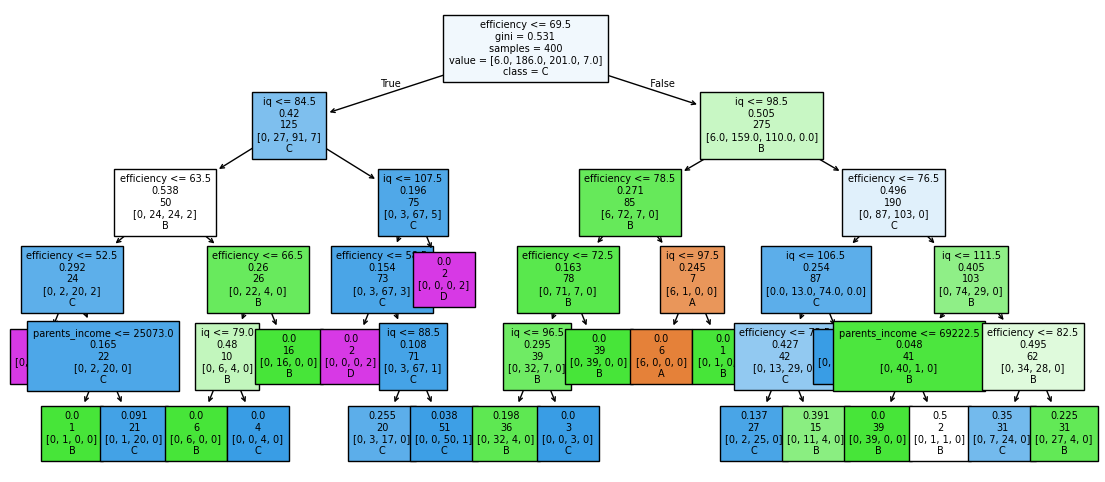

In [20]:
# For the meaning of numbers in boxes see root node
fig = plt.figure(figsize=(14,6))
tree_plot = tree.plot_tree(clf, 
                   feature_names=list(X_train.columns),  
                   class_names=['A','B','C','D','E','F'],
                   filled=True,
                   fontsize=7,
                   label='root')

## Random Forest Classifier

### Create train and test samples (train = 80%, test = 20% of the data)

In [21]:
# Create train and test samples            ... oben ist immer X-Achse und danach kommt target variable ..hier brand z.b und x sind die restlichen oben
X2_train, X2_test, y2_train, y2_test = train_test_split(df[['iq', 'age', 'parents_income', 'efficiency']],
                                                    df['grade_category'], 
                                                    test_size=0.20, 
                                                    random_state=5)

# Show X2_train
print('X2_train:')
print(X2_train.head(), '\n')

# Show y2_train
print('y2_train:')
print(y2_train.head())

X2_train:
        iq  age  parents_income  efficiency
247   90.0   24         65263.0        65.0
390   87.0   22         51086.0        72.0
186  107.0   18         40837.0        75.0
484   89.0   18         42453.0        69.0
139   82.0   18         32565.0        60.0 

y2_train:
247    C
390    B
186    C
484    C
139    C
Name: grade_category, dtype: category
Categories (5, object): ['F' < 'D' < 'C' < 'B' < 'A']


### Fit the Random Forest Classifier

In [25]:
# Initialize the random forest classifier
rfc = RandomForestClassifier(n_estimators=500, random_state=5, max_depth=5)

# Train the classification tree model
rfc = rfc.fit(X2_train, y2_train)

# Predict the target variable
y_pred_rf = rfc.predict(X2_test)

# Crosstab
print('Brand versus predicted grade:', '\n')
df_pred = pd.DataFrame(data={'grade_category': y2_test, 
                             'grade_category_predicted': y_pred_rf}).reset_index(drop=True)
df_pred

Brand versus predicted grade: 



,grade_category,grade_category_predicted
0,C,C
1,C,B
2,D,C
3,C,C
4,B,B
...,...,...
95,C,C
96,B,B
97,C,C
98,B,B


### Show confusion matrix and classification report

In [26]:
# Confusion matrix
print('Confusion matrix')
print(confusion_matrix(y2_test, y_pred_rf), '\n')

# Classification report
print('Classification report')
print(classification_report(y2_test, y_pred_rf))

Confusion matrix
[[ 0  1  0  0]
 [ 0 46  5  0]
 [ 0  4 42  0]
 [ 0  0  2  0]] 

Classification report
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         1
           B       0.90      0.90      0.90        51
           C       0.86      0.91      0.88        46
           D       0.00      0.00      0.00         2

    accuracy                           0.88       100
   macro avg       0.44      0.45      0.45       100
weighted avg       0.85      0.88      0.87       100

